#📌 EXTRAÇÃO

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/Thauanythiago/Challenge-TelecomX-II/refs/heads/main/dados_tratados.csv'
dados = pd.read_csv(url)
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Daily_cost
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.97


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [4]:
#Valores únicos por coluna
for col in dados.columns:
  print(f'Valores únicos na coluna "{col}": {dados[col].nunique()}')
  if dados[col].nunique() < 50:
    print(dados[col].unique())
    print('-' *50)

Valores únicos na coluna "customerID": 7043
Valores únicos na coluna "Churn": 2
[0 1]
--------------------------------------------------
Valores únicos na coluna "gender": 2
['Female' 'Male']
--------------------------------------------------
Valores únicos na coluna "SeniorCitizen": 2
[0 1]
--------------------------------------------------
Valores únicos na coluna "Partner": 2
[1 0]
--------------------------------------------------
Valores únicos na coluna "Dependents": 2
[1 0]
--------------------------------------------------
Valores únicos na coluna "tenure": 73
Valores únicos na coluna "PhoneService": 2
[1 0]
--------------------------------------------------
Valores únicos na coluna "MultipleLines": 3
['0' '1' 'No phone service']
--------------------------------------------------
Valores únicos na coluna "InternetService": 3
['DSL' 'Fiber optic' '0']
--------------------------------------------------
Valores únicos na coluna "OnlineSecurity": 3
['0' '1' 'No internet service']
-

# 🛠️ Preparação dos Dados

In [5]:
#Remoção de Colunas Irrelevantes
## Removendo a coluna customerID, pois ela não agrega valor ao modelo
dados = dados.drop(['customerID'], axis = 1)

In [6]:
df_clean = dados.copy()

In [7]:
# Substituindo o valor de 'No internet service' por 0
colunas_modificadas = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                       'TechSupport','StreamingTV','StreamingMovies']

for col in colunas_modificadas:
  df_clean [col] = df_clean [col].replace({'No internet service': '0'}).infer_objects(copy=False)

In [8]:
# Substituindo o valor de 'No phone service' por 0
df_clean['MultipleLines'] = df_clean['MultipleLines'].replace({'No phone service': '0'})

### Encoding

O <code>get_dummies</code> foi aplicado somente nas colunas categóricas do tipo <em>object</em> que não possuem ordem natural, para transformá-las em variáveis numéricas. Algumas colunas que representam serviços de internet e telefone (<code>DeviceProtection</code>, <code>TechSupport</code>, <code>StreamingTV</code>, <code>StreamingMovies</code>) tinham valores <code>0</code> e <code>1</code>, mas também incluíam a categoria <code>No internet service</code>, por isso o pandas interpretou como <em>object</em> e elas precisaram ser transformadas. Colunas binárias já numéricas foram mantidas, assim como as numéricas contínuas. Colunas transformadas (<em>object</em>): <code>gender</code>, <code>MultipleLines</code>, <code>InternetService</code>, <code>OnlineSecurity</code>, <code>OnlineBackup</code>, <code>DeviceProtection</code>, <code>TechSupport</code>, <code>StreamingTV</code>, <code>StreamingMovies</code>, <code>Contract</code> e <code>PaymentMethod</code>.



In [9]:
df_clean.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
 9   Contract          7043 non-null   object
 10  PaymentMethod     7043 non-null   object
dtypes: object(11)
memory usage: 605.4+ KB


In [10]:
cols_transform = ['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [11]:
df_encoded = pd.get_dummies(
    df_clean,
    columns=cols_transform,
    drop_first=False,   # True se quiser evitar dummy trap
    dtype=int           # garante int 0/1
)

df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Daily_cost,...,StreamingTV_1,StreamingMovies_0,StreamingMovies_1,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.20,...,1,1,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,0,59.9,542.40,2.01,...,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,2.34,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,3.17,...,1,0,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,2.97,...,1,1,0,1,0,0,0,0,0,1


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   Charges_Monthly                          7043 non-null   float64
 8   Charges_Total                            7032 non-null   float64
 9   Daily_cost                               7032 non-null   float64
 10  gender_Female                            7043 no

### Verificando e removendo dados nulos

In [13]:
df_encoded.isnull().sum()[df_encoded.isnull().sum() > 0]

,0
Charges_Total,11
Daily_cost,11


In [14]:
df_encoded = df_encoded.dropna(subset=['Charges_Total', 'Daily_cost'])

In [15]:
df_encoded.isnull().sum()[df_encoded.isnull().sum() > 0]

,0


### Verificação da Proporção de Evasão

Distribuição absoluta:
Churn
0    5174
1    1869
Name: count, dtype: int64

Distribuição percentual:
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64

⚠️ Observação: Há desbalanceamento entre as classes, o que pode impactar modelos preditivos.


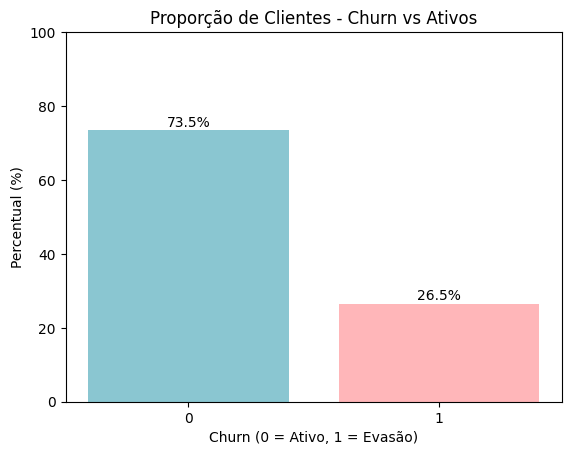

In [16]:
import matplotlib.pyplot as plt

# Distribuição absoluta
churn_counts = df_clean['Churn'].value_counts()

# Distribuição proporcional (%)
churn_percent = df_clean['Churn'].value_counts(normalize=True) * 100

print("Distribuição absoluta:")
print(churn_counts)
print("\nDistribuição percentual:")
print(churn_percent.round(2))

# Avaliação de equilíbrio
if abs(churn_percent[0] - churn_percent[1]) > 20:
    print("\n⚠️ Observação: Há desbalanceamento entre as classes, o que pode impactar modelos preditivos.")
else:
    print("\n✅ As classes estão relativamente equilibradas.")

# Gráfico
plt.bar(churn_percent.index.astype(str), churn_percent.values, color=['#8ac6d1', '#ffb6b9'])
plt.title("Proporção de Clientes - Churn vs Ativos")
plt.xlabel("Churn (0 = Ativo, 1 = Evasão)")
plt.ylabel("Percentual (%)")
plt.ylim(0, 100)
for i, val in enumerate(churn_percent.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center', fontsize=10)
plt.show()


### Análise de Correlação

In [17]:
corr = df_encoded.corr()

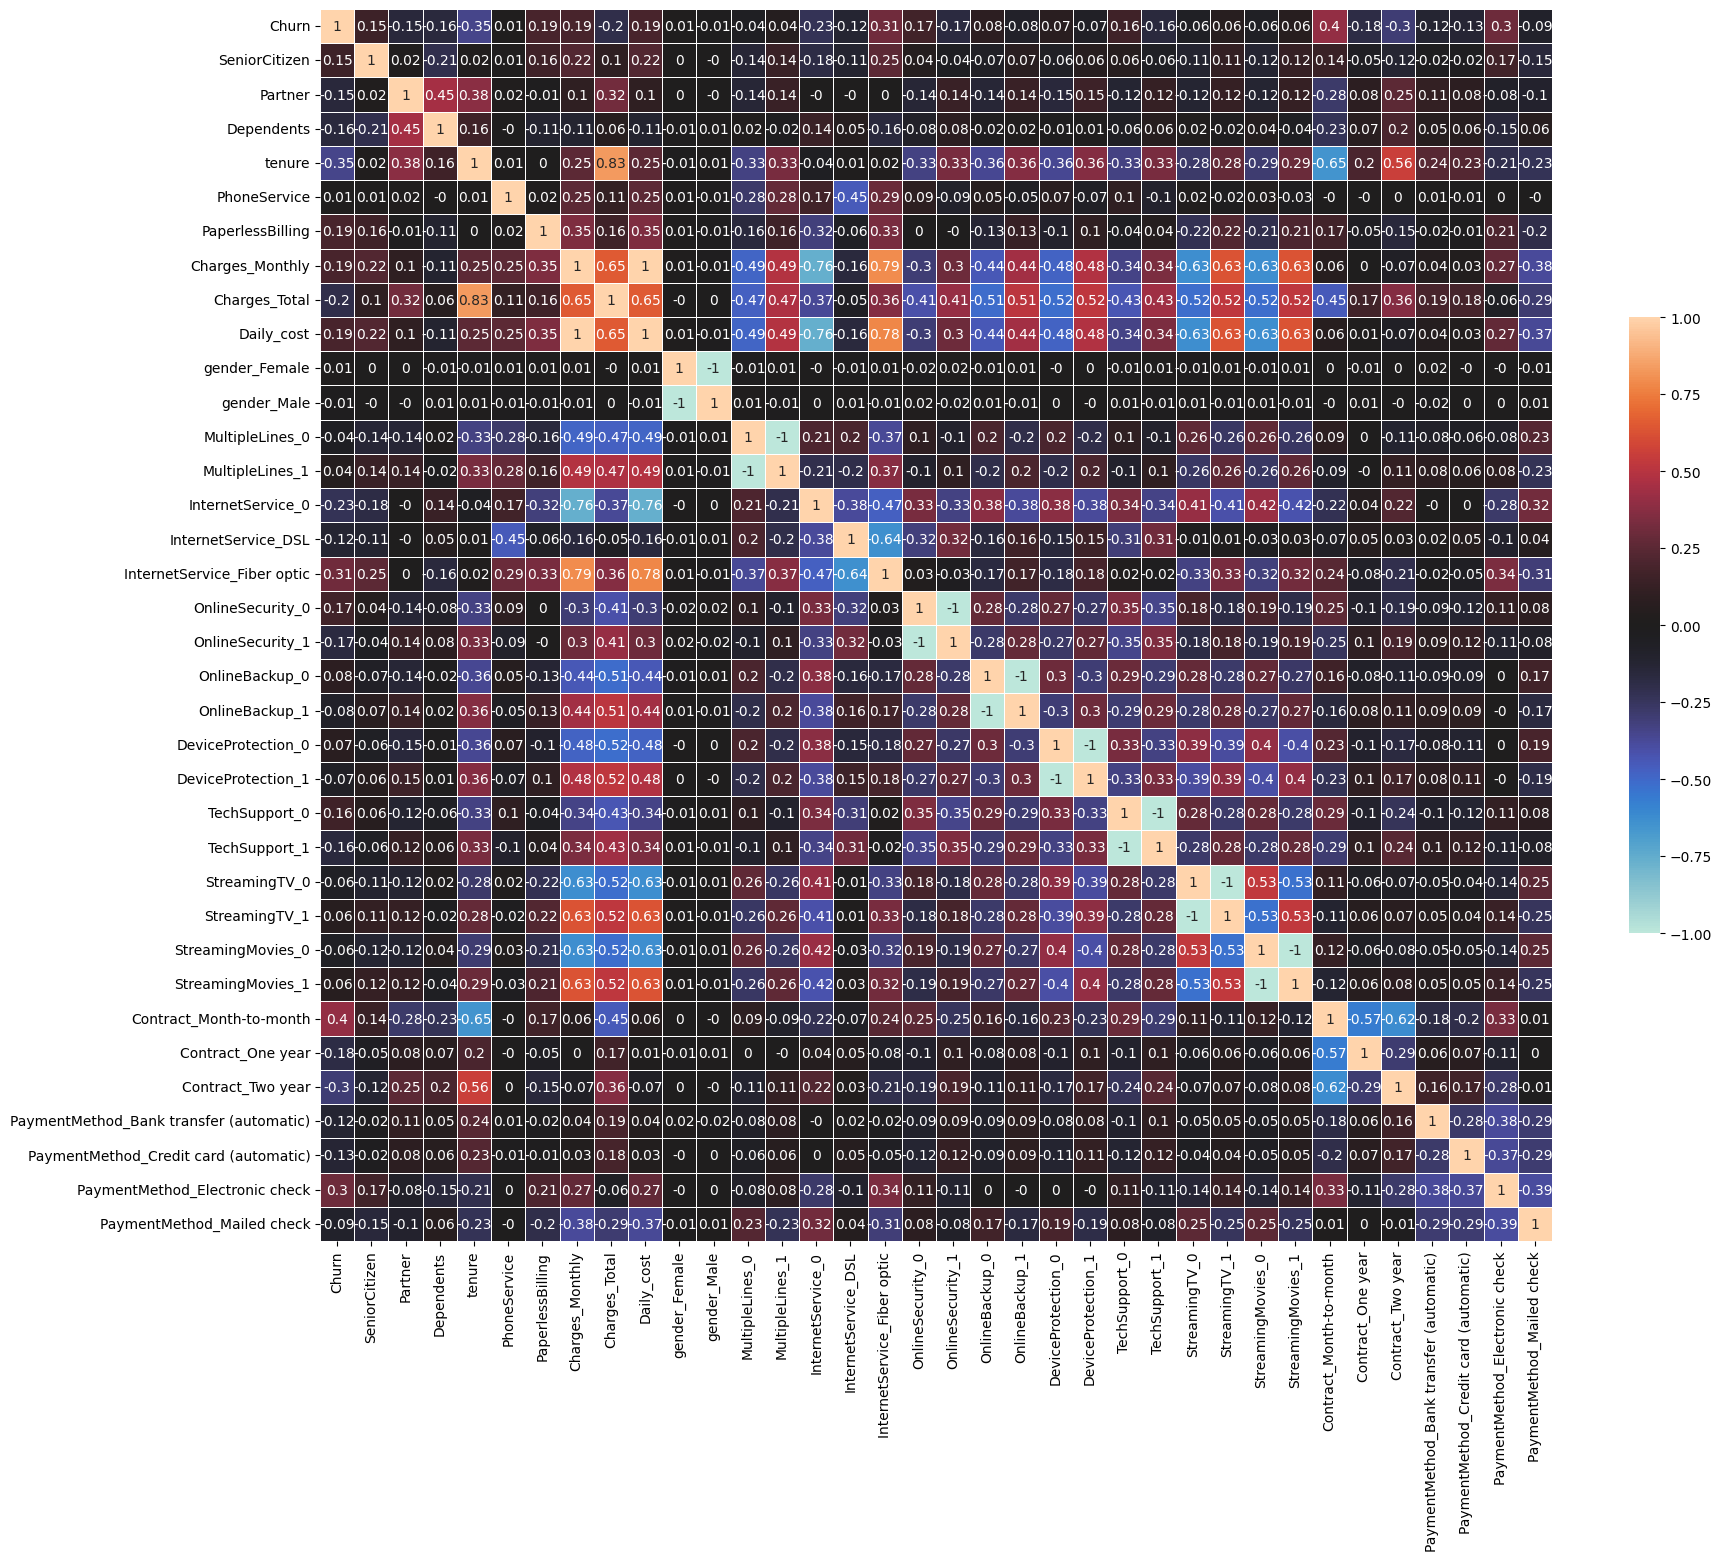

In [18]:
import numpy as np
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

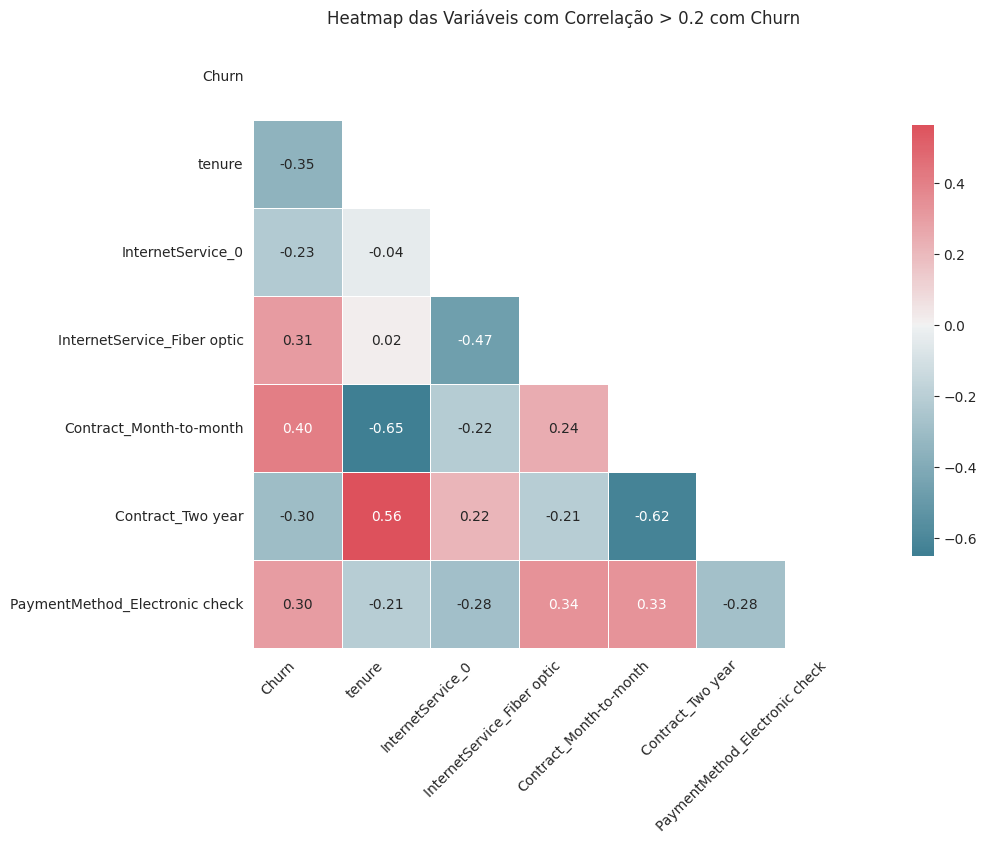

In [19]:
# Defina o limite de correlação
limite = 0.2

# Calcula a correlação de todas as colunas
cor_matrix = df_encoded.corr()

# Pega apenas as colunas que têm correlação maior que o limite em módulo com o alvo
alvo = "Churn"
cols_fortes = cor_matrix.index[cor_matrix[alvo].abs() > limite]

# Cria uma matriz apenas com essas colunas
cor_fortes_matrix = cor_matrix.loc[cols_fortes, cols_fortes]

# Máscara para esconder o triângulo superior
mask = np.triu(np.ones_like(cor_fortes_matrix, dtype=bool))

# Estilo do heatmap
sns.set_style("white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # cores azul-vermelho

# Heatmap com cores e triângulo inferior

plt.figure(figsize=(10,8))
sns.heatmap(
    cor_fortes_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    mask=mask,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title(f"Heatmap das Variáveis com Correlação > {limite} com {alvo}")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")
plt.show()


### Análises Direcionadas

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
cores = ['#5D6D7E', '#6C3483']

/tmp/ipython-input-823290467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Churn', y='tenure', palette=cores)


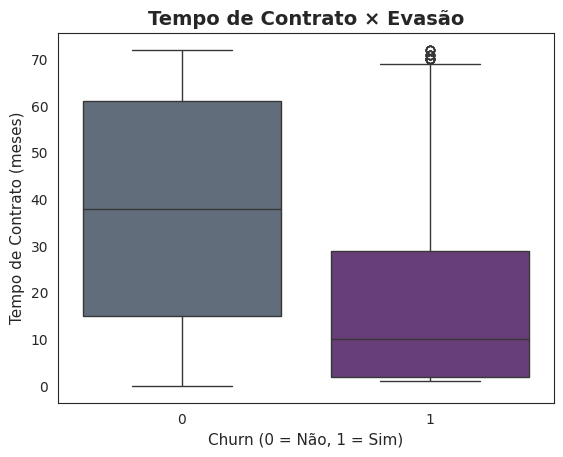

In [22]:
# Boxplot: Tempo de contrato x Churn
sns.boxplot(data=dados, x='Churn', y='tenure', palette=cores)
plt.title('Tempo de Contrato × Evasão',fontsize=14,weight='bold')
plt.xlabel('Churn (0 = Não, 1 = Sim)',fontsize=11)
plt.ylabel('Tempo de Contrato (meses)',fontsize=11)

plt.savefig('Tempo_de_Contrato.png', bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-380114987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Churn', y='Charges_Total', palette=cores)


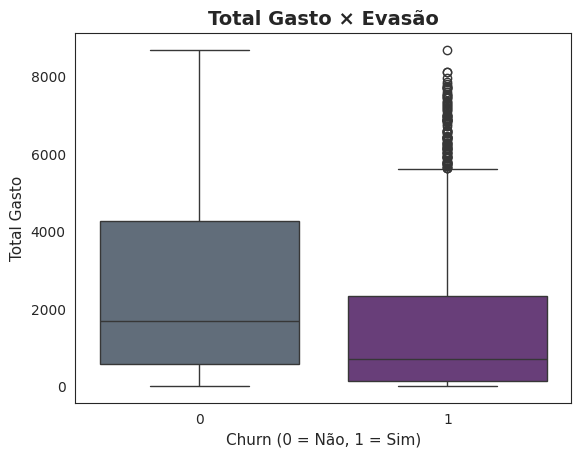

In [23]:
# Boxplot: Total gasto x Churn
sns.boxplot(data=dados, x='Churn', y='Charges_Total', palette=cores)
plt.title('Total Gasto × Evasão',fontsize=14,weight='bold')
plt.xlabel('Churn (0 = Não, 1 = Sim)',fontsize=11)
plt.ylabel('Total Gasto',fontsize=11)

plt.savefig('Total_gasto.png', bbox_inches='tight', dpi=300)
plt.show()

# Modelagem Preditiva

In [24]:
#Separação das variáveis explicativas (X) e da variável alvo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [25]:
#Divisão de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Modelo de regressão Logística

**Normalização dos dados**


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balanceamento dos dados**

In [27]:
from imblearn.over_sampling import SMOTE

# Aplica o SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)


**Modelo de regressão**

A regressão logística foi escolhida por ser um modelo clássico, que permite entender facilmente como cada variável influencia a evasão de clientes. Aplicou-se normalização porque o modelo é sensível à diferença de escala entre os dados. Observa-se que há desbalanceamento na proporção de clientes que permanecem e que deixam a empresa, por isso os dados foram balanceados para melhorar a identificação de ambos os grupos.

In [28]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_train_bal, y_train_bal)

#Predict
y_predict_lr = modelo_lr.predict(X_test_scaled)
y_proba_lr = modelo_lr.predict_proba(X_test_scaled)[:, 1]

#Avaliação do modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("="*50)
print("📊 Avaliação do Modelo: Regressão Logística")
print("="*50)

# Métricas principais
print(f"Acurácia: {accuracy_score(y_test, y_predict_lr):.4f}")
print(f"ROC AUC : {roc_auc_score(y_test, y_proba_lr):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_predict_lr))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_predict_lr, digits=4,target_names=['Permaneceu (0)', 'Evadiu (1)']))

📊 Avaliação do Modelo: Regressão Logística
Acurácia: 0.7474
ROC AUC : 0.8437

Matriz de Confusão:
[[1128  421]
 [ 112  449]]

Relatório de Classificação:
                precision    recall  f1-score   support

Permaneceu (0)     0.9097    0.7282    0.8089      1549
    Evadiu (1)     0.5161    0.8004    0.6275       561

      accuracy                         0.7474      2110
     macro avg     0.7129    0.7643    0.7182      2110
  weighted avg     0.8050    0.7474    0.7607      2110



### Modelo Random Forest

**Balanceamento dos dados**

In [29]:
smote = SMOTE(random_state=42)
X_train_bal_rf, y_train_bal_rf = smote.fit_resample(X_train, y_train)

**Random Forest**

O Random Forest foi selecionado por ser robusto e lidar bem com variáveis numéricas e categóricas sem precisar de normalização. Ela captura relações complexas entre as variáveis e mostra a importância de cada uma na previsão da evasão. Apesar de ser menos sensível ao desbalanceamento, os dados também foram balanceados para garantir que clientes que deixam a empresa sejam bem identificados.

In [30]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_bal_rf, y_train_bal_rf)

#Predict
y_predict_rf = modelo_rf.predict(X_test)
y_proba_rf = modelo_rf.predict_proba(X_test)[:, 1]

#Avaliação do modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("="*50)
print("📊 Avaliação do Modelo: Random Forest")
print("="*50)

# Métricas principais
print(f"Acurácia: {accuracy_score(y_test, y_predict_rf):.4f}")
print(f"ROC AUC : {roc_auc_score(y_test, y_proba_rf):.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_predict_rf))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_predict_rf, digits=4,target_names=['Permaneceu (0)', 'Evadiu (1)']))

📊 Avaliação do Modelo: Random Forest
Acurácia: 0.7787
ROC AUC : 0.8194

Matriz de Confusão:
[[1337  212]
 [ 255  306]]

Relatório de Classificação:
                precision    recall  f1-score   support

Permaneceu (0)     0.8398    0.8631    0.8513      1549
    Evadiu (1)     0.5907    0.5455    0.5672       561

      accuracy                         0.7787      2110
     macro avg     0.7153    0.7043    0.7093      2110
  weighted avg     0.7736    0.7787    0.7758      2110



# Avaliação dos Modelos

#### **Regressão Logística**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix,precision_recall_curve, average_precision_score
)

In [32]:
print("="*50)
print("📊 Avaliação do Modelo: Regressão Logística")
print("="*50)
print(f"Acurácia : {accuracy_score(y_test, y_predict_lr):.4f}")
print(f"Precisão : {precision_score(y_test, y_predict_lr):.4f}")
print(f"Recall   : {recall_score(y_test, y_predict_lr):.4f}")
print(f"F1-score : {f1_score(y_test, y_predict_lr):.4f}")
print(f"ROC AUC  : {roc_auc_score(y_test, y_proba_lr):.4f}")

📊 Avaliação do Modelo: Regressão Logística
Acurácia : 0.7474
Precisão : 0.5161
Recall   : 0.8004
F1-score : 0.6275
ROC AUC  : 0.8437


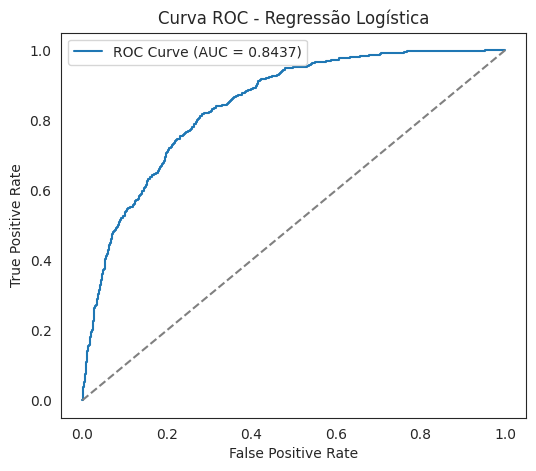

In [33]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba_lr):.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regressão Logística")
plt.legend()
plt.show()

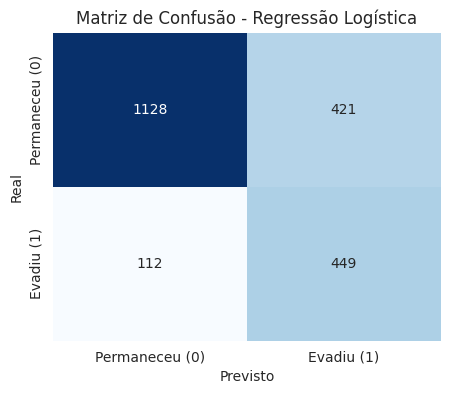

In [34]:
# Matriz de Confusão (gráfico)
cm = confusion_matrix(y_test, y_predict_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Permaneceu (0)', 'Evadiu (1)'],
            yticklabels=['Permaneceu (0)', 'Evadiu (1)'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


#### **Random Forest**

In [35]:
print("="*50)
print("📊 Avaliação do Modelo: Random Forest")
print("="*50)
print(f"Acurácia : {accuracy_score(y_test, y_predict_rf):.4f}")
print(f"Precisão : {precision_score(y_test, y_predict_rf):.4f}")
print(f"Recall   : {recall_score(y_test, y_predict_rf):.4f}")
print(f"F1-score : {f1_score(y_test, y_predict_rf):.4f}")
print(f"ROC AUC  : {roc_auc_score(y_test, y_proba_rf):.4f}")

📊 Avaliação do Modelo: Random Forest
Acurácia : 0.7787
Precisão : 0.5907
Recall   : 0.5455
F1-score : 0.5672
ROC AUC  : 0.8194


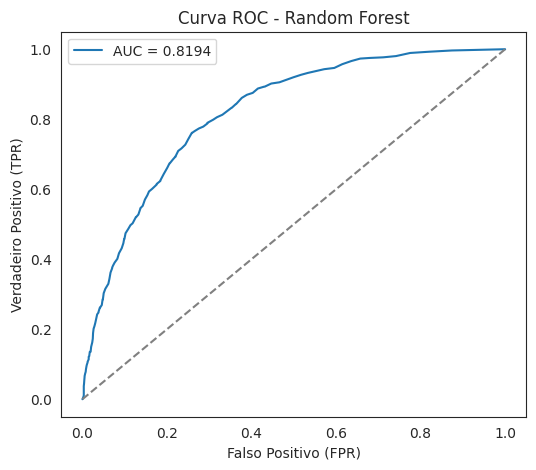

In [36]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_rf):.4f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("Falso Positivo (FPR)")
plt.ylabel("Verdadeiro Positivo (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

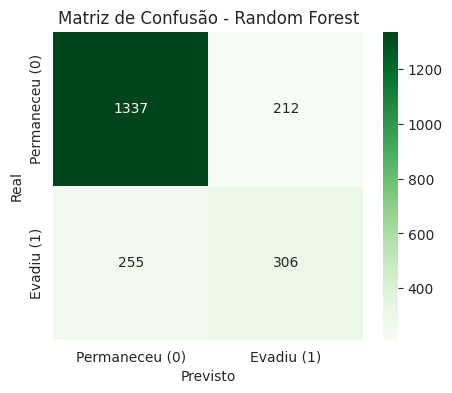

In [37]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_predict_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',xticklabels=['Permaneceu (0)', 'Evadiu (1)'],
            yticklabels=['Permaneceu (0)', 'Evadiu (1)'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

### Comparação dos modelos

**Random Forest** 🎯  
- **Acurácia:** 0,78  
- **Precisão:** 0,59  
- **Ponto forte:** erra menos ao prever churn, ou seja, quando indica que um cliente vai evadir, normalmente está certo.  
- **Ponto fraco:** recall mais baixo (0,55), perdendo vários clientes que realmente vão churn.  

**Regressão Logística**  
- **Recall:** 0,80  
- **F1-score:** 0,63  
- **ROC AUC:** 0,84, mostrando boa separação das classes.  
- **Ponto forte:** identifica a maioria dos clientes que podem evadir, capturando mais churns.  
- **Ponto fraco:** erra mais em clientes que não vão churn (precisão menor).  

💡 **Análise geral:**  
- A Random Forest tem acurácia e precisão ligeiramente melhores, sendo mais confiável quando prevê churn.  
- A Regressão Logística leva vantagem no recall e F1-score, equilibrando melhor a identificação dos churns.  
- Na matriz de confusão, a Random Forest acerta mais clientes que permanecem ativos, mas perde vários churns. A regressão logística detecta mais churns, mesmo que erre mais na classe negativa.  

**Conclusão:**  
Se o objetivo é **minimizar a perda de clientes**, a regressão logística é mais eficiente.  
Se o foco fosse **precisão geral nas previsões**, a Random Forest seria preferida.  
No nosso caso, priorizamos **capturar o máximo de clientes que podem evadir**, então seguimos com a **Regressão Logística**.


## Overfitting

In [38]:
from sklearn.metrics import accuracy_score

# Acurácia nos dados de treino
acc_log_train = accuracy_score(y_train_bal, modelo_lr.predict(X_train_bal))
acc_rf_train = accuracy_score(y_train_bal_rf, modelo_rf.predict(X_train_bal_rf))

# Acurácia nos dados de teste
acc_log_test = accuracy_score(y_test, y_predict_lr)
acc_rf_test = accuracy_score(y_test, y_predict_rf)

# Função para alertar overfitting
def verificar_overfitting(acc_train, acc_test):
    diff = acc_train - acc_test
    if diff > 0.1:
        return "⚠️ Possível Overfitting"
    else:
        return "✅ Sem Overfitting aparente"

# Exibir resultados
print("="*30)
print("Verificação de Overfitting")
print("="*30)
print(f"Regressão Logística:")
print(f"Treino: {acc_log_train * 100:.2f}%")
print(f"Teste:  {acc_log_test * 100:.2f}%")
print(verificar_overfitting(acc_log_train, acc_log_test))
print("-" * 30)

print(f"Random Forest:")
print(f"Treino: {acc_rf_train * 100:.2f}%")
print(f"Teste:  {acc_rf_test * 100:.2f}%")
print(verificar_overfitting(acc_rf_train, acc_rf_test))

Verificação de Overfitting
Regressão Logística:
Treino: 78.13%
Teste:  74.74%
✅ Sem Overfitting aparente
------------------------------
Random Forest:
Treino: 99.90%
Teste:  77.87%
⚠️ Possível Overfitting


# Análise de Importância das Variáveis

#### **Regressão Logística**

📊 Regressão Logística - Top 10 Variáveis que Aumentam a Evasão
                          Variável  Coeficiente
7                    Charges_Total     2.292015
28         Contract_Month-to-month     0.792719
15     InternetService_Fiber optic     0.704700
5                 PaperlessBilling     0.402856
33  PaymentMethod_Electronic check     0.361996
8                       Daily_cost     0.275669
22                   TechSupport_0     0.214839
0                    SeniorCitizen     0.162405
16                OnlineSecurity_0     0.155776
25                   StreamingTV_1     0.102276

📊 Regressão Logística - Top 10 Variáveis que Reduzem a Evasão
                                   Variável  Coeficiente
31  PaymentMethod_Bank transfer (automatic)    -0.146096
17                         OnlineSecurity_1    -0.168340
2                                Dependents    -0.168981
1                                   Partner    -0.177298
32    PaymentMethod_Credit card (automatic)    -0.184841
23  

/tmp/ipython-input-2719039269.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2719039269.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


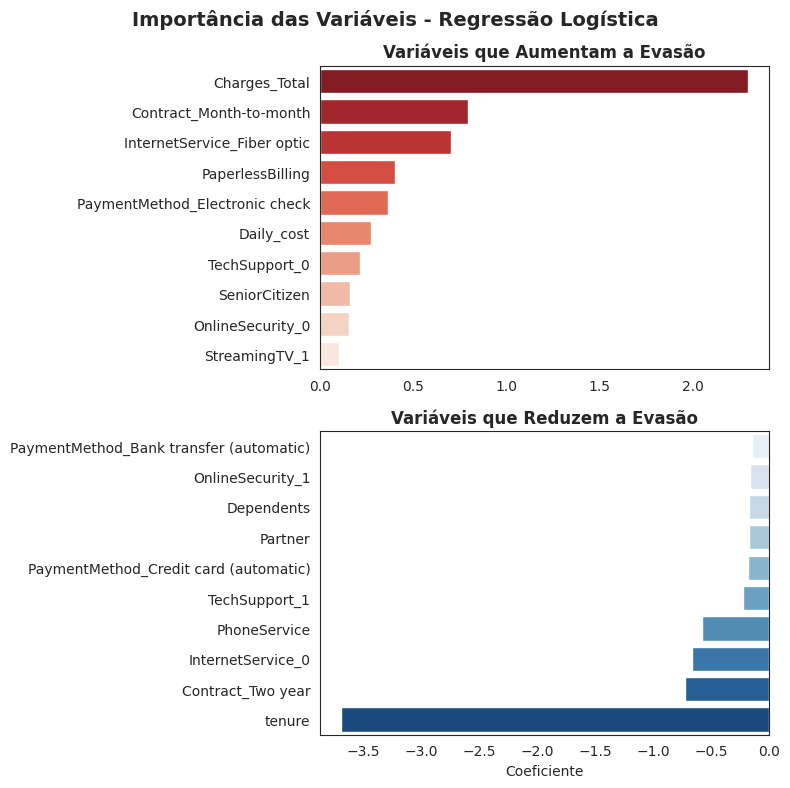

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Coeficientes da regressão
coeficientes = pd.DataFrame({
    "Variável": X_train.columns,
    "Coeficiente": modelo_lr.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

# Separar positivos e negativos
coef_positivos = coeficientes[coeficientes["Coeficiente"] > 0].head(10)
coef_negativos = coeficientes[coeficientes["Coeficiente"] < 0].tail(10)

# Prints
print("="*50)
print("📊 Regressão Logística - Top 10 Variáveis que Aumentam a Evasão")
print("="*50)
print(coef_positivos)

print("\n" + "="*50)
print("📊 Regressão Logística - Top 10 Variáveis que Reduzem a Evasão")
print("="*50)
print(coef_negativos)

# Gráficos - um abaixo do outro
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=False)

# Positivos
sns.barplot(
    data=coef_positivos,
    x="Coeficiente",
    y="Variável",
    palette="Reds_r",
    ax=axes[0]
)
axes[0].set_title("Variáveis que Aumentam a Evasão", fontsize=12, weight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# Negativos
sns.barplot(
    data=coef_negativos,
    x="Coeficiente",
    y="Variável",
    palette="Blues",
    ax=axes[1]
)
axes[1].set_title("Variáveis que Reduzem a Evasão", fontsize=12, weight="bold")
axes[1].set_xlabel("Coeficiente")
axes[1].set_ylabel("")

plt.suptitle("Importância das Variáveis - Regressão Logística", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


#### **Random Forest**


Importância das Variáveis - Random Forest:
                   Variável  Importância
7             Charges_Total     0.098656
3                    tenure     0.094246
8                Daily_cost     0.093008
6           Charges_Monthly     0.092327
30        Contract_Two year     0.062453
28  Contract_Month-to-month     0.061091
17         OnlineSecurity_1     0.038922
29        Contract_One year     0.034255
23            TechSupport_1     0.033934
1                   Partner     0.026501


/tmp/ipython-input-1790898234.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


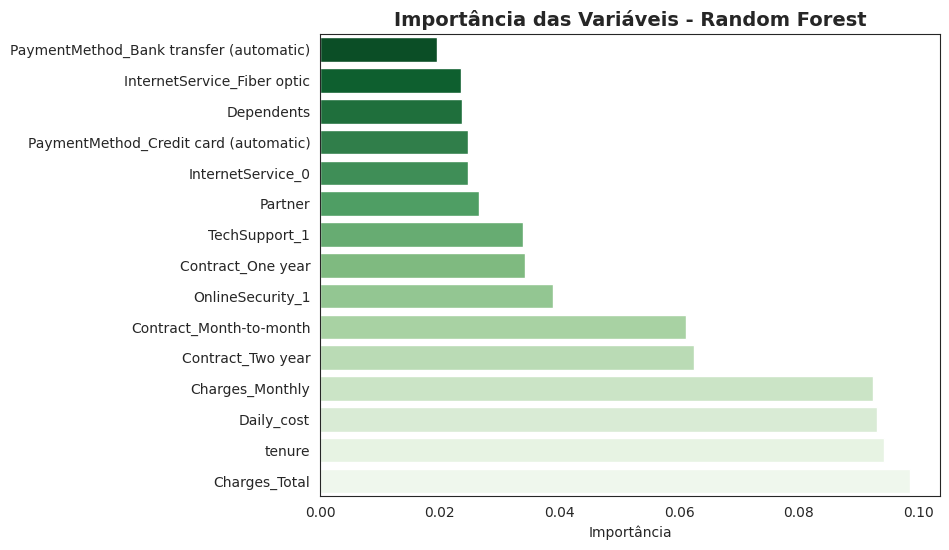

In [40]:
# Importância das variáveis no Random Forest
importancias = pd.DataFrame({
    "Variável": X_train.columns,
    "Importância": modelo_rf.feature_importances_
})

# Ordenar por relevância
importancias = importancias.sort_values(by="Importância", ascending=False)
print("\n" + "="*50)
print("Importância das Variáveis - Random Forest:")
print("="*50)
print(importancias.head(10))  # Top 10

# Visualização
import seaborn as sns

# Ordenar os dados
importancias_sorted = importancias.sort_values(by="Importância", ascending=True).tail(15)

# Plot melhorado
plt.figure(figsize=(8,6))
sns.barplot(
    data=importancias_sorted,
    x="Importância",
    y="Variável",
    palette="Greens_r"
)

plt.title("Importância das Variáveis - Random Forest", fontsize=14, weight="bold")
plt.xlabel("Importância")
plt.ylabel("")
plt.show()

# Conclusão

A análise preditiva confirmou vários padrões já observados na etapa exploratória. Tanto a **Regressão Logística** quanto o **Random Forest** apontaram que **custos mais altos** (como *Charges_Total*, *Daily_cost* e *Monthly Charges*) estão fortemente associados à evasão, reforçando que clientes com contas mais elevadas são mais propensos a sair.  

O **tipo de contrato** também foi decisivo: clientes em **contratos mensais** demonstram muito mais risco de churn, enquanto contratos **anuais ou bienais** reduzem significativamente essa probabilidade. Outro ponto crítico é o **método de pagamento**: o uso do *Electronic Check* está ligado à evasão, enquanto **pagamentos automáticos** (cartão de crédito ou transferência bancária) estão associados à maior permanência.  

No caso da **Regressão Logística**, também se destacou que clientes **sem serviços adicionais** (como suporte técnico ou segurança online) tendem a sair mais, enquanto quem adere a esses serviços demonstra maior fidelização. Já no **Random Forest**, o fator **tempo de contrato (tenure)** apareceu como um dos principais indicadores, mostrando que os primeiros meses são cruciais para retenção.  

---

#### **Recomendações**

- **Fidelização por contrato**: incentivar planos anuais/bienais com benefícios adicionais.  
- **Gestão de custos**: criar planos mais acessíveis ou personalizados para clientes de alto gasto.  
- **Engajamento e facilidades**: estimular adesão a serviços extras de valor agregado e incentivar pagamentos automáticos.  

Essas estratégias, combinadas, podem ajudar a reduzir significativamente a evasão e melhorar a experiência dos clientes da **Telecom X**.
